## Here we need to construct a linear model thet explains the relationship a car's milage has with other attributes.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
auto_data = pd.read_csv('auto-mpg.csv')
auto_data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


### EDA

In [ ]:
# we don't need car_name column so will drop it
auto_data = auto_data.drop('car name',axis=1)

In [10]:
auto_data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


In [32]:
# Find missing values for horsepower
hpIsDigit = pd.DataFrame(auto_data.horsepower.str.isdigit())
hpIsDigit.head(2)

,horsepower
0,True
1,True


In [30]:
auto_data[hpIsDigit['horsepower']== False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [34]:
# Replace ? symbol with Nan
auto_data = auto_data.replace('?',np.nan)
auto_data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


#### There are various ways to handle missing values , drop the rows, replace the missing values with median , but here there are 6 such rows, so we will best consider mean or median.

In [39]:
# describe the data set
auto_data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [43]:
# we will replace the missing values of horsepower with it's median values
# this fillna with fill the corresponding column with respective meadian values is some other
# columns had nan values

auto_data = auto_data.fillna(auto_data.median())

In [45]:
# just a check if the nan values have been populated with median values
auto_data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,93.5,2046,19.0,71,1
126,21.0,6,200.0,93.5,2875,17.0,74,1
330,40.9,4,85.0,93.5,1835,17.3,80,2
336,23.6,4,140.0,93.5,2905,14.3,80,1
354,34.5,4,100.0,93.5,2320,15.8,81,2
374,23.0,4,151.0,93.5,3035,20.5,82,1


In [46]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [48]:
# we will convert the horsepower dtype as float64
auto_data['horsepower'] = auto_data['horsepower'].astype('float64')

In [50]:
auto_data.horsepower.dtypes

dtype('float64')

### BiVariate Analysis

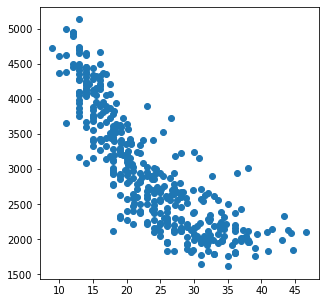

In [54]:
# analysis of milage with weight
plt.figure(figsize=(5,5))
plt.scatter(auto_data['mpg'],auto_data['weight']);

In [56]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


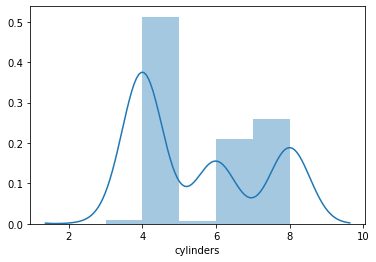

In [68]:
sns.distplot(auto_data.cylinders)